# Logistic Classification: Wisconsin Breast Cancer Dataset

The logistic regression is a technique with a misleading name: despite of being technically speaking a regression method, it actually performs a classification. This is what we will study through the Wisconsin Breast Cancer Dataset, which relates many different cellular characteristics to the diagnosis of a patient: either bening or malignant.

If this method reaches an accuracy high enough, it could substitute the skills of experienced oncologist in cancer diagnosis (or at least, be a support).

### Table of Contents

- [0. Loading the Dataset](#0.-Loading-the-Dataset)
- [1. Correlation Matrix](#1.-Correlation-Matrix)
- [2. Logistic Regression - sklearn](#2.-Logistic-Regression---sklearn)

# 0. Loading the Dataset

In [1]:
import numpy   as np
import scipy   as sc
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

df=pd.read_csv('Datasets/Breast_Cancer_Wisconsin.csv',)
columns=df.columns
print(columns)
print(len(columns))

Y=df['diagnosis']
X=df.drop(['diagnosis','id'], axis=1)

dict={'M':1, 'B':0}
y=Y.map(dict)
print()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
32



## 1. Correlation Matrix

The diagnosis comes in the dataset as 'M' and 'B', for malignant and benign types of cancer. We will convert this to numerical values (1 and 0 respectively). 

To get some preliminary information about our data, we represent the correlation matrix, a visual representation of the [Pearson Correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between the variables. We show only the lower triangular matrix since the matrix is symmetric and the diaginal is =1.

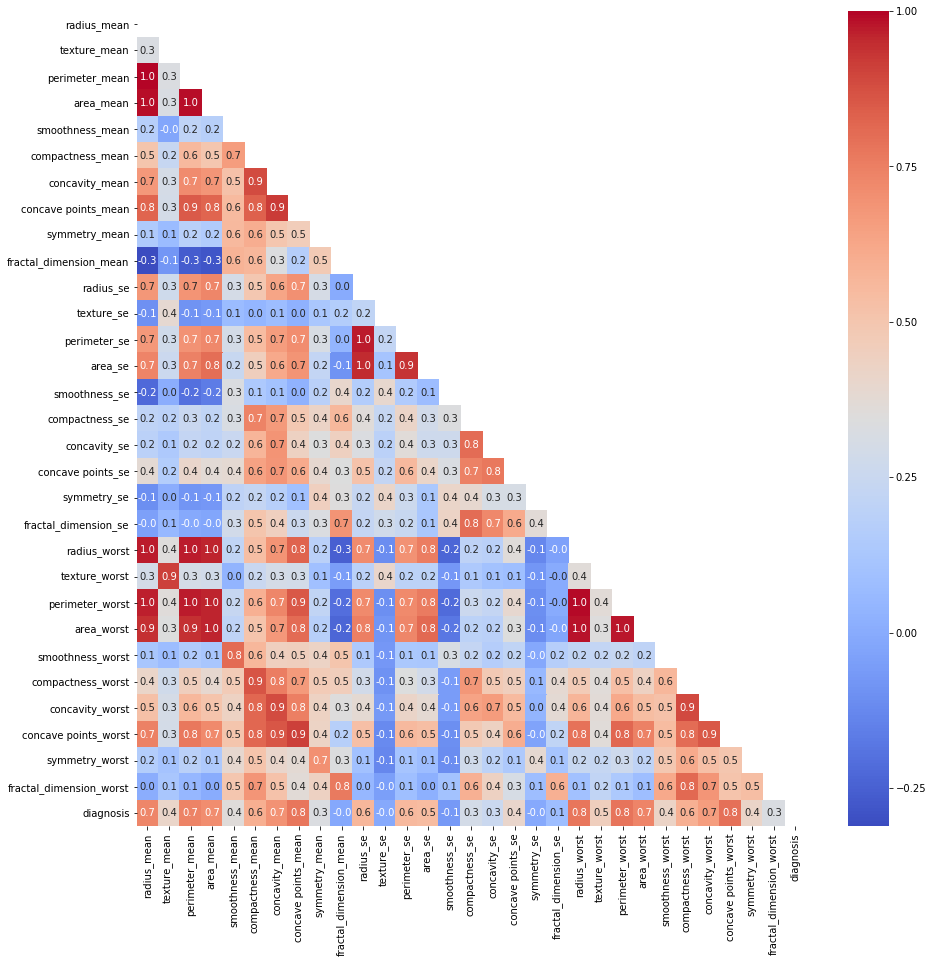

In [15]:
# Correlation Matrix plot - Since it is symmetric, only triangular
fig=plt.figure(figsize=(15,15))
XY=X.join(y)
CXY=XY.corr()
mask = np.zeros_like(CXY, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heat=sb.heatmap(CXY,mask=mask,annot=True, fmt='.1f',cmap='coolwarm')
fig.add_subplot(heat)
plt.show()

Having a dataset with a large number of variables and instances means having a lot of information about the problem we want to solve, and those are great news! However, there is an important downside: the computational cost increases, sometimes up to intractable levels, and the understanding and interpretation of the problem might become tough too. Let alone visual representation! (which we can only do in 1D/2D/3D). 

For this reason, there are several techniques to reduce the dimensionality of the problem and still get a meaningful representation of the original dataset. One of them could be to choose a subset of variables based on the matrix above. It becomes evident that some of the variables that have correlation = 1 between each other (radius_worst, perimeter_worst, etc.) must be somehow related (like the radius and perimeter obviously are). Some variables have very low correlation with the diagnosis, and those could be ignored too.

This is one of the many utilities of the correlation matrix. However, despite of this introduction being necessary, we won't apply this here. The dataset is still computationally tractable, and we want obtain the best accuracy possible! So instead, in the following section other techniques not to reduce dimensionality but to maximize the accuracy will be applied.

## 2. Logistic Regression - sklearn

We will calculate the [logistic regression](https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102) using the sklearn library. Different changes will be applied over the dataset to see whether or not higher accuracies are reachable.

In [50]:
from sklearn.datasets        import load_iris
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split
#We import the following because, to this date, a persistent FutureWarning is found
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Simple Logistic Regression

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3)
xyfit = LogisticRegression().fit(X_train,Y_train)
TestValue=xyfit.score(X_test,Y_test)
print('Test score:',TestValue)

Test score: 0.9649122807017544


### Simple Logistic Regression - Average over 200 train-test
More realistic value, since we evaluate for different partitions of train-test.

In [52]:
l1=[]

for j in range(200):
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3)
  xyfit = LogisticRegression().fit(X_train,Y_train)
  l1.append(xyfit.score(X_test,Y_test))
  
MeanTest=np.mean(l1)
print('Average of Test Score:',MeanTest)

Average of Test Score: 0.949766081871345


### Adding Polynomial Terms
We include polynomial variables with interactions to our previous logistic regression model. The precision increases slightly.

In [53]:
l2 = []

for i in range(200):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(PolynomialFeatures(2).fit_transform(X), Y, test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l2.append(clf.score(X_test, Y_test))
  
MeanTest=np.mean(l2)
print('Test Score:', MeanTest)

Test Score: 0.9565789473684211


### Scaling of the Variables (without polynomial)


In [54]:
l3 = []

for i in range(200):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(scale(X, with_mean=False), Y, test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l3.append(clf.score(X_test, Y_test))
  
MeanTest=np.mean(l3)
print('Test Score:', MeanTest)

Test Score: 0.9703801169590642


### Scaling of the Variables (including polynomial)


In [102]:
l4 = []

for i in range(200):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(PolynomialFeatures(2).fit_transform(scale(X, with_mean=False)), Y, test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l4.append(clf.score(X_test, Y_test))
  
MeanTest=np.mean(l4)
print('Test Score:', MeanTest)

Test Score: 0.9644444444444444


### Mean-Free Scaling of the Variables (without polynomial)


In [76]:
l5 = []

for i in range(200):
  
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(scale(X, with_mean=True), Y, test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l5.append(clf.score(X_test, Y_test))
  
np.mean(l5)

0.9771052631578947

### Mean-Free Scaling of the Variables (with polynomial)


In [57]:
l6 = []

for i in range(200):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(PolynomialFeatures(2).fit_transform(scale(X, with_mean=True)), Y, test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l6.append(clf.score(X_test, Y_test))
  
np.mean(l6)

0.962046783625731

In [ ]:
As we can see